In [1]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import soundfile as sf


In [2]:
# Update with the actual dataset locations
tess_path = r"C:\Users\ALL\Downloads\TESS"
ravdess_path = r"C:\Users\ALL\Downloads\RAVDESS"
crema_path = r"C:\Users\ALL\Downloads\crema-d (2)\AudioWAV"


In [3]:
# Function to get all audio file paths
def get_audio_files(directory):
    file_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".wav"):  # Ensure only .wav files are collected
                file_paths.append(os.path.join(root, file))
    return file_paths

# Get file paths for each dataset
tess_files = get_audio_files(tess_path)
ravdess_files = get_audio_files(ravdess_path)
crema_files = get_audio_files(crema_path)

# Print number of files found
print(f"TESS: {len(tess_files)} files")
print(f"RAVDESS: {len(ravdess_files)} files")
print(f"CREMA-D: {len(crema_files)} files")


TESS: 5600 files
RAVDESS: 2879 files
CREMA-D: 7442 files


In [8]:
# Function to extract metadata
def extract_audio_metadata(files):
    data = []
    for file in files:
        try:
            y, sr = librosa.load(file, sr=None)  # Load file with original sample rate
            duration = librosa.get_duration(y=y, sr=sr)
            label = os.path.basename(file).split("_")[0]  # Adjust based on dataset format
            data.append([file, sr, duration, label])
        except Exception as e:
            print(f"Error loading {file}: {e}")
    return pd.DataFrame(data, columns=["Filename", "Sample Rate", "Duration", "Emotion"])

# Process each dataset
df_tess = extract_audio_metadata(tess_files)
df_ravdess = extract_audio_metadata(ravdess_files)
df_crema = extract_audio_metadata(crema_files)

# Combine datasets
df_combined = pd.concat([df_tess, df_ravdess, df_crema], ignore_index=True)

# Show basic statistics
print(df_combined.describe())
df_combined.head()


        Sample Rate      Duration
count  15921.000000  15921.000000
mean   24755.076440      2.580668
std    11585.497858      0.707794
min    16000.000000      1.254076
25%    16000.000000      2.047104
50%    24414.000000      2.402375
75%    24414.000000      3.036375
max    96000.000000      5.271937


,Filename,Sample Rate,Duration,Emotion
0,C:\Users\ALL\Downloads\TESS\TESS Toronto emoti...,24414,1.539035,OAF
1,C:\Users\ALL\Downloads\TESS\TESS Toronto emoti...,24414,1.616613,OAF
2,C:\Users\ALL\Downloads\TESS\TESS Toronto emoti...,24414,1.542025,OAF
3,C:\Users\ALL\Downloads\TESS\TESS Toronto emoti...,24414,1.606865,OAF
4,C:\Users\ALL\Downloads\TESS\TESS Toronto emoti...,24414,1.395183,OAF


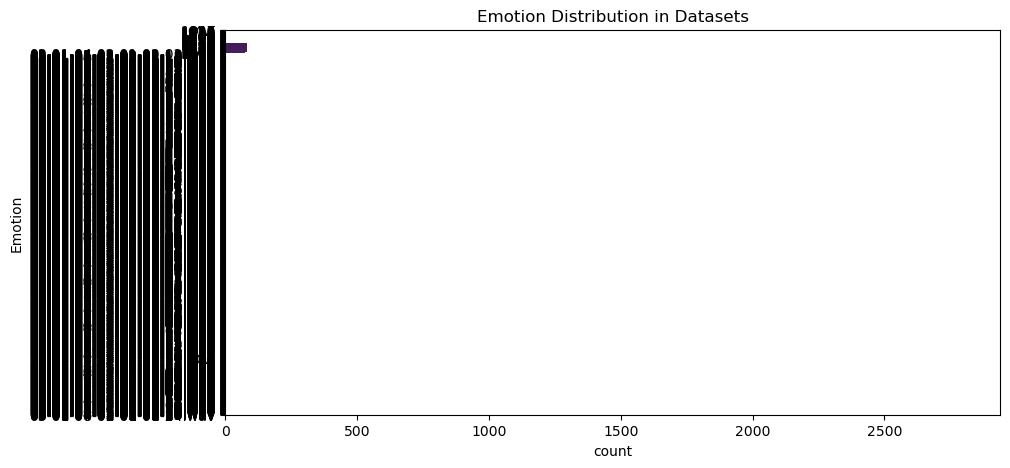

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df_combined["Emotion"], order=df_combined["Emotion"].value_counts().index, palette="viridis")
plt.title("Emotion Distribution in Datasets")
plt.show()


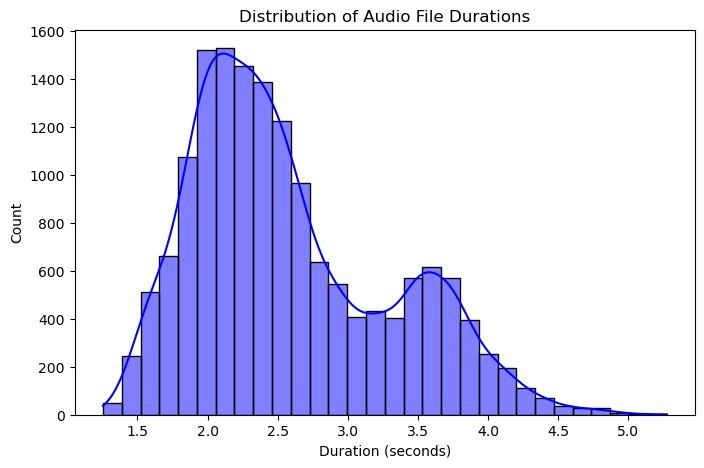

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df_combined["Duration"], bins=30, kde=True, color="blue")
plt.xlabel("Duration (seconds)")
plt.title("Distribution of Audio File Durations")
plt.show()


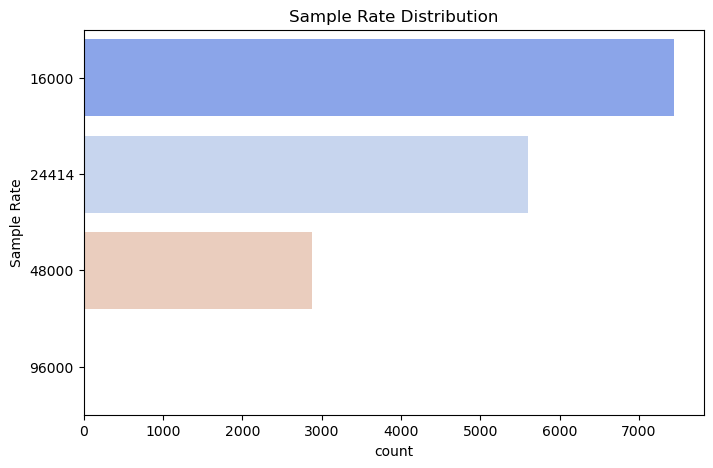

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df_combined["Sample Rate"], palette="coolwarm")
plt.title("Sample Rate Distribution")
plt.show()


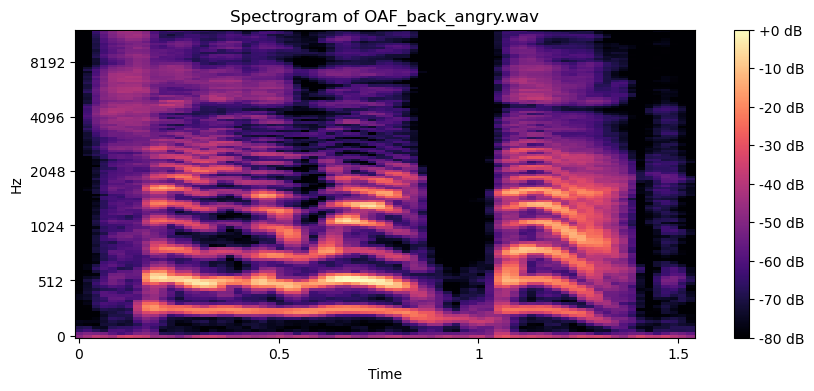

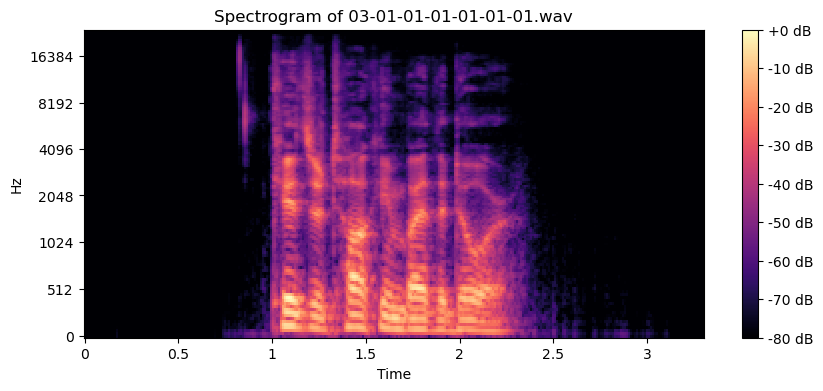

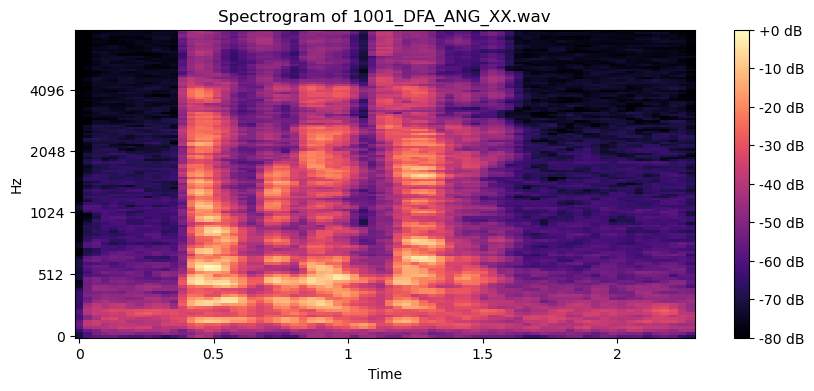

In [12]:
def plot_spectrogram(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    plt.figure(figsize=(10, 4))
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr, x_axis="time", y_axis="mel")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Spectrogram of {os.path.basename(audio_path)}")
    plt.show()

# Plot one example from each dataset
plot_spectrogram(tess_files[0])
plot_spectrogram(ravdess_files[0])
plot_spectrogram(crema_files[0])


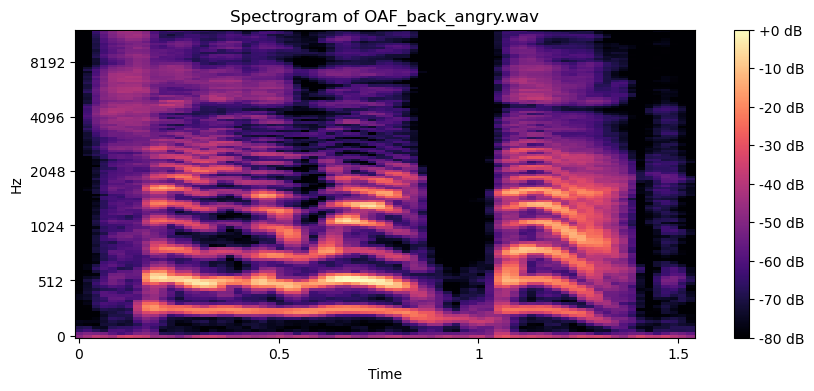

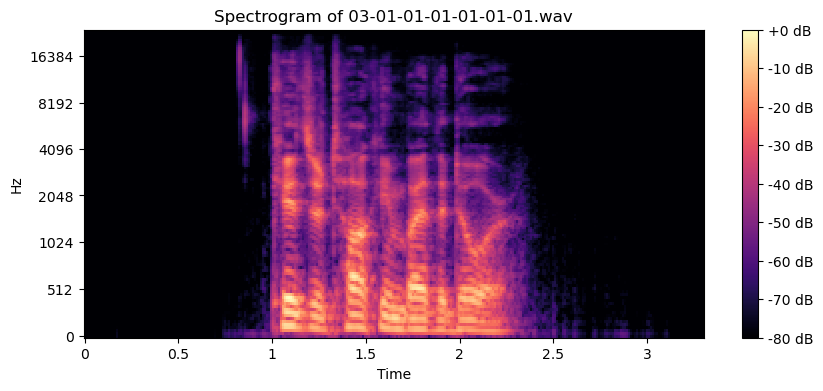

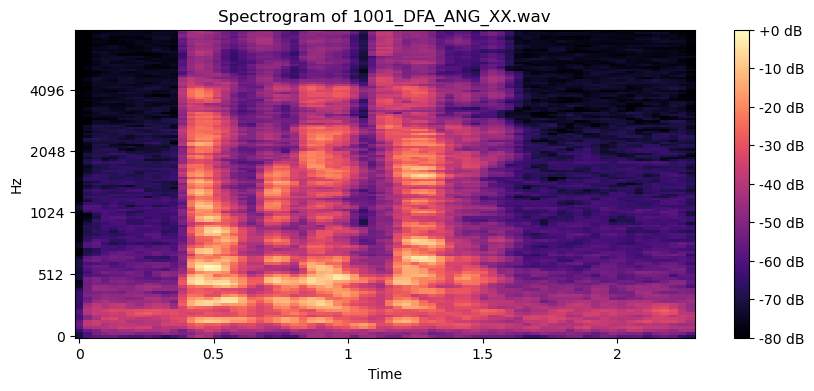

In [13]:
def plot_spectrogram(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    plt.figure(figsize=(10, 4))
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr, x_axis="time", y_axis="mel")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Spectrogram of {os.path.basename(audio_path)}")
    plt.show()

# Plot one example from each dataset
plot_spectrogram(tess_files[0])
plot_spectrogram(ravdess_files[0])
plot_spectrogram(crema_files[0])


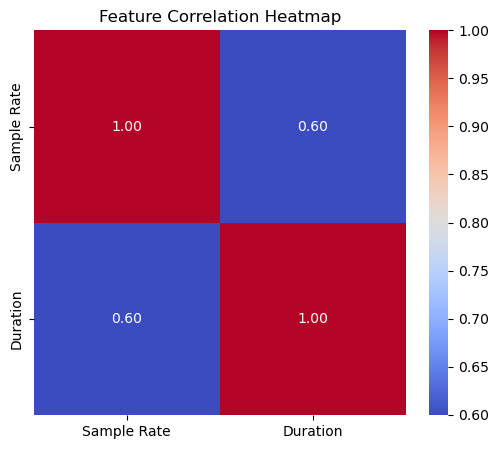

In [17]:
# Drop non-numeric columns
numeric_df = df_combined.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [20]:
df_combined.to_csv("audio_metadata.csv", index=False)
print("Metadata saved as 'audio_metadata.csv'")


Metadata saved as 'audio_metadata.csv'
